# Máster en Big Data Science - UNAV 
-----------------------------------------------------------------------------------------------------------------------------------------
**Preparación y Limpieza de Datos - Proyecto de curso**

 María Auxiliadora Solano Ramírez - Febrero 2022

**Contenido**
1. Aspectos generales
2. Importación de datos
3. Transformación de campos
4. Estadística descrciptiva
5. Limpieza de datos 
6. Feature selection
7. Modelo

## 1. Aspectos generales

### 1.1 Fuente de datos

Se selecciona una base de datos relacionada con desastres naturales a nivel mundial desde 1950 hasta 2010
- Nombre: Natural Disasters Data Explorer
- Página web: https://www.kaggle.com/mathurinache/natural-disasters-data-explorer

### 1.2 Objetivo:

Identificar la relación entre la variable Total economic damages con el resto de variables

### 1.3 Bases de datos:

DataFrame creados para ser manipulados a lo largo de este Notebook
 - data: lectura de base de datos
 - df_unido: base de datos transformada
 - X: base de datos de inspección
 - datos: base datos para limpiar
 - data_final: base de datos lista para el modelo

## 2. Importación de datos

Importación de los datos desde el disco duro del ordenador al Cluster de Databricks para luego acceder a la tabla creada y ser transformado en un DataFrame

In [4]:
!pip install lightgbm

### 2.1 Importación de librerías requeridas

In [1]:
# numpy and pandas for data manipulation
import pandas as pd
import numpy as np

# model used for feature importances
import lightgbm as lgb

# utility for early stopping with a validation set
from sklearn.model_selection import train_test_split

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# memory management
import gc

# utilities
from itertools import chain

### 2.2 Carga de datos

In [2]:
# Leer csv
data = pd.read_csv("C:/Users/auxis/Documents/Master/Preparación y limpieza de datos/Proyecto/natural-disasters.csv")
data

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.000000,2.381236
1,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1960,0.000000,0.000000,44.060951
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1970,0.000000,0.000000,547.029875
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1980,0.000000,0.000000,218.081859
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1990,0.006322,0.000000,316.150814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1970,0.017477,0.000000,0.000000
1600,0.0,0.0,0.0,0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1980,0.000000,0.000000,0.000000
1601,0.0,0.0,505500.0,0,505500.0,0.0,0.0,5000.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1990,0.000000,0.000000,4839.765250
1602,0.0,0.0,810000.0,0,810000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002268,0.0,0.0,Zimbabwe,2000,0.006677,0.000000,7023.254487


### 2.3 Exploración del DataFrame

In [7]:
#Forma: filas y columnas
filas = data.shape[0]
print("filas: "+str(filas))
columnas = data.shape[1]
print("columnas: "+str(columnas))

filas: 1604
columnas: 171


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Columns: 171 entries, Number of deaths from drought to total_affected_rate_per_100k_all_disasters
dtypes: float64(152), int64(18), object(1)
memory usage: 2.1+ MB


In [16]:
#Revisión de encabezados de columnas
for col in data.columns: #Se hace con for para imprimir las 171
    print(col)

Number of deaths from drought
Number of people injured from drought
Number of people affected from drought
Number of people left homeless from drought
Number of total people affected by drought
Reconstruction costs from drought
Insured damages against drought
Total economic damages from drought
Death rates from drought
Injury rates from drought
Number of people affected by drought per 100,000
Homelessness rate from drought
Total number of people affected by drought per 100,000
Number of deaths from earthquakes
Number of people injured from earthquakes
Number of people affected by earthquakes
Number of people left homeless from earthquakes
Number of total people affected by earthquakes
Reconstruction costs from earthquakes
Insured damages against earthquakes
Total economic damages from earthquakes
Death rates from earthquakes
Injury rates from earthquakes
Number of people affected by earthquakes per 100,000
Homelessness rate from earthquakes
Total number of people affected by earthquake

In [29]:
#Reconocer la columna Entity
print("min  "+ str(data["Entity"].min()))
print("max  "+ str(data["Entity"].max()))
print(data["Entity"].describe())

min  Afghanistan
max  Zimbabwe
count      1604
unique      226
top       India
freq         12
Name: Entity, dtype: object


In [36]:
#Cantidad de registros por país
data.groupby("Entity")["Entity"].count().sort_values(ascending=False)

Entity
India                        12
Morocco                      12
Upper middle income          12
United States                12
Canada                       12
                             ..
Sint Maarten (Dutch part)     1
Qatar                         1
Cayman Islands                1
United Arab Emirates          1
Brunei                        1
Name: Entity, Length: 226, dtype: int64

In [38]:
#Filtrar datos de España como ejemplo
data[data.Entity == "Spain"]

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
1358,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Spain,1940,0.007677,0.046064,0.046064
1359,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Spain,1950,0.008800,0.000000,0.023899
1360,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,Spain,1960,0.000000,0.000000,0.000000
1361,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.011798,0.0,0.000000,Spain,1970,0.005418,0.000000,0.013374
1362,0.0,0.0,0.0,0,0.0,0.0,0.0,296000.0,0.0,0.0,...,0.000000,0.0,0.058414,0.0,0.000000,Spain,1980,0.010768,0.015549,207.602316
1363,0.0,0.0,600000.0,0,600000.0,0.0,0.0,770000.0,0.0,0.0,...,0.000311,0.0,0.008215,0.0,0.000680,Spain,1990,0.012050,0.000000,1536.054245
1364,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.017189,0.0,0.023036,Spain,2000,0.013391,0.000490,1.962655
1365,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.002393,0.0,0.000000,Spain,2010,0.003421,0.000000,5.233529


### 2.4 Conclusiones

a) Entidad: Columna correspondiente a la identificación del país o región más amplia como el continente. 

b) Año: Se identifica que cada línea por país cada 10 años. Además, existen un indicador generalizado para cada año: total_affected_rate_per_100k_all_disasters que corresponde a la tasa total de afectados por 100k personas respecto a todos los desastres del año.

c) Desastres: Se identifican los siguientes desastres naturales en el DataSet
 - drought: sequía
 - earthquakes: temblores
 - disasters: desastres generales
 - volcanic activity: actividad volcánica
 - floods: inundaciones
 - mass movements: movimientos de masas
 - storms: tormentas
 - landslides: movimientos de tierra 
 - fog: niebla
 - wildfires: incendios forestales
 - extreme temperatures: temperaturas extremas
 - lake outbursts: arrebatos del lago
 - glacial lake outbursts: estallidos de lagos glaciares

d) Indicadores del DataSet: Muestra disintitos indicadores para distintos desastres naturales
 - Number of people injured: Número de personas heridas
 - Number of people affected: Número de personas afectadas
 - Number of people left homeless: Número de personas que quedaron sin hogar
 - Number of total people affected: Número total de personas afectadas
 - Insured damages: Daños asegurados
 - Total economic damages: Daños económicos totales
 - Death rates: Tasa de mortalidad
 - Injury rates: Tasa de lesiones
 - Number of people affected per 100,000: Número de personas afectadas por cada 100.000

## 3. Transformación de campos

Reducción de columnas: Para realizar esta exploración con mayor detalle, se dividirá el DataSet por tipo de desastre natural para su mejor comprensión.

### 3.1 Nombres genéricos de columnas

Definición de una función para cambiar los nombres de las columnas y agregar una columna identificadora del desastre natural

In [72]:
#Función para la asignación genérica de columnas
#Variables de la función (disaster,df)
#  disaster: nombre del desastre
#  df: data set propia del desastre

def col_gen (disaster,df):
    #Cambio a nombres genéricos en columnas
    oldColumns = list(df.columns)
    newColumns = ["Number of deaths","Number of people injured","Number of people affected","Number of people left homeless","Number of total people affected","Reconstruction costs","Insured damages against","Total economic damages","Death rates","Injury rates","Number of people affected per 100,000","Homelessness rate","Total number of people affected per 100,000","Entity","Year"]

    #Definición del nuevo DataSet
    df2 = df
    #Cambiar uno a uno los nombres de las columnas
    for c in range (len(oldColumns)):
        nombre_anterior = oldColumns[c] 
        nombre_nuevo = newColumns[c]
        df2 = df2.rename(columns={oldColumns[c]:newColumns[c]})

    #Agregar columna con identificador del desastre descrito
    #df2 = df2.withColumn("Disaster",lit((disaster)))
    df2['Disaster'] = str(disaster)

    #Esquema de columnas
    return(df2)

### 3.2 División del DataSet

Tras la revisión de los indicadores relacionados con los desastres naturales, se define una función que permite la identificación de cada indicador para cada desastre natural de manera aplicable en todos los casos

In [73]:
#Función para la Definición del DataFrame para cada desastre natural
def data_frame(desastre):
    #Identificador de columnas requeridas bajo estándar de nombre
    Number_of_deaths = "Number of deaths from " + str(desastre)
    Number_of_people_injured = "Number of people injured from " + str(desastre)
    Number_of_people_affected = 'Number of people affected by ' + str(desastre)
    Number_of_people_left_homeless = 'Number of people left homeless from ' + str(desastre)
    Number_of_total_people_affected = 'Number of total people affected by ' + str(desastre)
    Reconstruction_costs = 'Reconstruction costs from ' + str(desastre)
    Insured_damages = 'Insured damages against ' + str(desastre)
    Total_economic_damages = 'Total economic damages from ' + str(desastre)
    Death_rates = 'Death rates from ' + str(desastre)
    Injury_rates = 'Injury rates from ' + str(desastre)
    Number_of_people_affected_per100 = 'Number of people affected by '+ str(desastre)+ ' per 100,000'
    Homelessness_rate = 'Homelessness rate from ' + str(desastre)
    Total_number_of_people_affected_per100 = 'Total number of people affected by ' + str(desastre) + ' per 100,000'
    #Total_economic_damages_as_a_share_of_GDP = 'Total economic damages from ' + str(desastre) + ' as a share of GDP'
    
    #Corregir nombre no estándar para 'Number of people affected from drought' (de from a by)
    data2 = data.rename(columns={'Number of people affected from drought': 'Number of people affected by drought'})
    
    #Definición de columnas requeridas en el DataSet
    df_desastre = data2.loc[:,[Number_of_deaths, 
                            Number_of_people_injured, 
                            Number_of_people_affected, 
                            Number_of_people_left_homeless,
                            Number_of_total_people_affected,
                            Reconstruction_costs,
                            Insured_damages,
                            Total_economic_damages,
                            Death_rates,
                            Injury_rates,
                            Number_of_people_affected_per100,
                            Homelessness_rate,
                            Total_number_of_people_affected_per100 ,
                            #Total_economic_damages_as_a_share_of_GDP,
                            "Entity",
                            "Year"]]
    
    #display(df_desastre)
    df_desastre2 = col_gen(desastre,df_desastre)
    
    return(df_desastre2)

### 3.3 Ejecución de la transformación de columnas
Ejecución de las funciones para cada tipo de desastre

In [77]:
#Lista de Desastres naturales 
desastres=['drought','earthquakes','disasters','volcanic activity','floods','mass movements','storms','landslides','fog','wildfires','extreme temperatures','glacial lake outbursts']

#Transformación uno a uno de los desastres 
for desastre in desastres:
    df_parcial = data_frame(desastre)
    #El primer DataFrame creado
    if desastre == desastres[0]:
        df_unido = df_parcial
    #Unión de los DataFrame creados
    else:
        df_unido = df_unido.append([df_parcial])

#Validar el tipo de DataFrame como Pandas para su tratamiento posterior    
print(type(df_unido))
#Nueva estructura 
display(df_unido.shape)
#Visualización de nuevo DataFrame
display(df_unido)


<class 'pandas.core.frame.DataFrame'>


(19248, 16)

,Number of deaths,Number of people injured,Number of people affected,Number of people left homeless,Number of total people affected,Reconstruction costs,Insured damages against,Total economic damages,Death rates,Injury rates,"Number of people affected per 100,000",Homelessness rate,"Total number of people affected per 100,000",Entity,Year,Disaster
0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000,Afghanistan,1950,drought
1,0.0,0.0,4800.0,0.0,4800.0,0.0,0.0,20.0,0.0,0.0,44.060951,0.0,44.060951,Afghanistan,1960,drought
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Afghanistan,1970,drought
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Afghanistan,1980,drought
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Afghanistan,1990,drought
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1970,glacial lake outbursts
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1980,glacial lake outbursts
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1990,glacial lake outbursts
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Zimbabwe,2000,glacial lake outbursts


### 3.4 Conclusiones
Conclusiones para el nuevo DataFrame transformado y unido

a) Entidad: Se registran 226 entidades en la columna *Entity* entre países y regiones de mayor amplitud

In [78]:
#Datos de Entidad
print(len(df_unido['Entity'].unique()))
print(df_unido['Entity'].unique())

226
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'High income

b) Año: Se identifican datos desde 1900 hasta 2010 con una periodicidad de cada 10 años

In [79]:
#Cantidad de registros por perido de 10 años
df_unido.groupby("Year")["Year"].count()

Year
1900     528
1910     744
1920     876
1930    1068
1940    1152
1950    1392
1960    1764
1970    1980
1980    2184
1990    2508
2000    2568
2010    2484
Name: Year, dtype: int64

c) Desastres: Se identifican 1604 registros para cada tipo de desastre

In [80]:
#Revisión de encabezados de columnas
print(df_unido.groupby('Disaster')['Disaster'].count())

Disaster
disasters                 1604
drought                   1604
earthquakes               1604
extreme temperatures      1604
floods                    1604
fog                       1604
glacial lake outbursts    1604
landslides                1604
mass movements            1604
storms                    1604
volcanic activity         1604
wildfires                 1604
Name: Disaster, dtype: int64


d) Indicadores del DataSet: Se mantienen los siguientes indicadores:
- Number of deaths
- Number of people injured
- Number of people affected 
- Number of people left homeless
- Number of total people affected
- Reconstruction costs
- Insured damages against
- Total economic damages 
- Death rates
- Injury rates 
- Number of people affected per 100,000
- Homelessness rate
- Total number of people affected per 100,000

In [81]:
print(df_unido.columns)

Index(['Number of deaths', 'Number of people injured',
       'Number of people affected', 'Number of people left homeless',
       'Number of total people affected', 'Reconstruction costs',
       'Insured damages against', 'Total economic damages', 'Death rates',
       'Injury rates', 'Number of people affected per 100,000',
       'Homelessness rate', 'Total number of people affected per 100,000',
       'Entity', 'Year', 'Disaster'],
      dtype='object')


## 4. Estadística descriptiva
Se toma como ejemplo un sub-dataset del país España

### 4.1 Datos generales

In [82]:
#Copia del DataFrame
datos = df_unido

#Se selecciona España para este ejercicio
nuevo_df = datos[datos['Entity'] == "Spain"]

In [83]:
#Variables numéricas
nuevo_df.describe()

,Number of deaths,Number of people injured,Number of people affected,Number of people left homeless,Number of total people affected,Reconstruction costs,Insured damages against,Total economic damages,Death rates,Injury rates,"Number of people affected per 100,000",Homelessness rate,"Total number of people affected per 100,000",Year
count,96.000000,96.000000,96.000000,96.000000,96.000000,72.0,72.000000,7.200000e+01,80.000000,80.000000,88.000000,88.000000,80.000000,96.000000
mean,36.272917,5.789583,14225.479167,43.968750,14275.237500,0.0,6594.166667,8.654228e+04,0.104301,0.017213,39.669219,0.108429,21.886701,1975.000000
std,218.436291,23.945735,86740.612778,230.208793,86748.689618,0.0,24103.149742,2.202499e+05,0.560960,0.067942,230.986217,0.526805,172.150199,23.033157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1940.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1957.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1975.000000
75%,2.000000,0.000000,0.000000,0.000000,5.500000,0.0,0.000000,3.662500e+04,0.005419,0.000319,0.000000,0.000000,0.001603,1992.500000
max,1530.400000,166.000000,602185.000000,1500.000000,602208.900000,0.0,121200.000000,1.045700e+06,3.592191,0.434288,1535.994341,3.185796,1530.495115,2010.000000


In [84]:
#Variables categóricas
nuevo_df[['Entity','Disaster']].describe()

,Entity,Disaster
count,96,96
unique,1,12
top,Spain,drought
freq,96,8


### 4.2 Resultados consolidados

In [85]:
#Tabla anual de desastres con muertes
print("\033[1m" + "Tabla anual de desastres con muertes" + "\033[0m")
nuevo_df=nuevo_df[nuevo_df['Number of deaths']!=0]
muertes=nuevo_df.groupby(["Year",'Disaster'])["Number of deaths"].sum()
print(muertes)

Tabla anual de desastres con muertes
Year  Disaster            
1940  disasters                  2.0
      storms                     2.0
1950  disasters                 16.4
      earthquakes                1.1
      floods                    12.7
      storms                     2.6
1960  disasters                 44.5
      floods                    44.5
1970  disasters                 94.1
      extreme temperatures      40.0
      floods                    52.2
      storms                     1.9
1980  disasters                 23.8
      extreme temperatures       4.0
      floods                    13.9
      storms                     4.2
      wildfires                  1.7
1990  disasters                 19.8
      extreme temperatures       3.0
      floods                     1.6
      landslides                 8.4
      storms                     4.8
      wildfires                  2.0
2000  disasters               1530.4
      extreme temperatures    1515.9
      flood

<AxesSubplot:title={'center':'Desastres con muertes'}, xlabel='Year'>

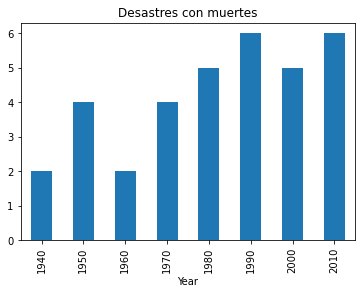

In [86]:
#Gráfica de la cantidad de desastres con Muertes por año
muertes_2 = nuevo_df.groupby("Year")['Disaster'].count()
muertes_2.plot(kind="bar",rot=90,title="Desastres con muertes")

### 4.3 Datos calculados

In [87]:
#Ìndice de afectación
nuevo_df['Rates'] = nuevo_df['Death rates']+nuevo_df['Injury rates']+nuevo_df['Homelessness rate']
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1359 to 1365
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Number of deaths                             34 non-null     float64
 1   Number of people injured                     34 non-null     float64
 2   Number of people affected                    34 non-null     float64
 3   Number of people left homeless               34 non-null     float64
 4   Number of total people affected              34 non-null     float64
 5   Reconstruction costs                         28 non-null     float64
 6   Insured damages against                      28 non-null     float64
 7   Total economic damages                       28 non-null     float64
 8   Death rates                                  27 non-null     float64
 9   Injury rates                                 27 non-null     float64
 10 

<AxesSubplot:title={'center':'Ìndice de afectación promedio'}, xlabel='Disaster'>

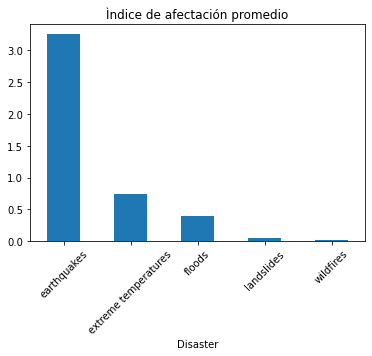

In [88]:
#Eliminar valores nulos por problemas en el cálculo
nuevo_df=nuevo_df.dropna()
#Cambio de tipo de valores
nuevo_df['Rates'] = nuevo_df['Rates'].astype('float64')
#Cálculo del índice promedio
rate_prom = nuevo_df.groupby("Disaster")['Rates'].mean()
rate_prom.plot(kind="bar",rot=45,title="Ìndice de afectación promedio")

In [89]:
#Índice de afectación anual
floods = nuevo_df[nuevo_df['Disaster']=="floods"]
rate_prom_anual = floods.groupby("Year")['Rates'].mean()
print("\033[1m" + "Índice de afectación anual de inundaciones" + "\033[0m")
display(rate_prom_anual)

Índice de afectación anual de inundaciones


Year
1960    0.143202
1970    0.161839
1980    2.016927
1990    0.004021
2000    0.033006
2010    0.020050
Name: Rates, dtype: float64

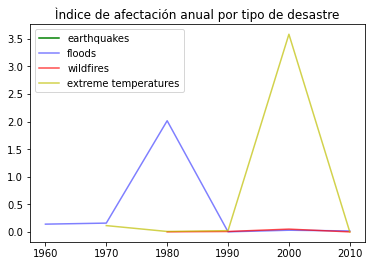

In [90]:
#Separación por tipo de desastre
earthquakes = nuevo_df[nuevo_df['Disaster']=="earthquakes"]
floods = nuevo_df[nuevo_df['Disaster']=="floods"]
wildfires = nuevo_df[nuevo_df['Disaster']=="wildfires"]
temperatures = nuevo_df[nuevo_df['Disaster']=="extreme temperatures"]

fig,ax = plt.subplots()
ax.plot(earthquakes['Year'],earthquakes['Rates'],color="g")
ax.plot(floods['Year'],floods['Rates'],color="b",alpha=0.5)
ax.plot(wildfires['Year'],wildfires['Rates'],color="r",alpha=0.7)
ax.plot(temperatures['Year'],temperatures['Rates'],color="y",alpha=0.7)

ax.set_title("Ìndice de afectación anual por tipo de desastre")
ax.legend(["earthquakes","floods","wildfires","extreme temperatures"])
plt.show()

## 5. Limpieza de datos

In [91]:
#DataFrame para limpiar: datos
datos=df_unido
datos.shape

(19248, 16)

### 5.1 Valores perdidos
- Filas: Eliminación de filas con valores NAN
- Ajustar tipo de columnas afectadas por los valores NAN

In [92]:
#Eliminar valores nulos
#Cantidad de valores nulos
print("\033[1m" + "Valores nulos por columnas" + "\033[0m")
print(datos.isnull().sum())

#Remplazar na
datos=datos.dropna()

#Validar eliminación
print("\033[1m" + "Nueva forma" + "\033[0m")
print(datos.shape)

Valores nulos por columnas
Number of deaths                                  0
Number of people injured                          0
Number of people affected                         0
Number of people left homeless                    0
Number of total people affected                   0
Reconstruction costs                           5760
Insured damages against                        5760
Total economic damages                         5760
Death rates                                    3208
Injury rates                                   3208
Number of people affected per 100,000          1604
Homelessness rate                              1604
Total number of people affected per 100,000    3208
Entity                                            0
Year                                              0
Disaster                                          0
dtype: int64
Nueva forma
(10116, 16)


In [93]:
#Esquema
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10116 entries, 1 to 1603
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Number of deaths                             10116 non-null  float64
 1   Number of people injured                     10116 non-null  float64
 2   Number of people affected                    10116 non-null  float64
 3   Number of people left homeless               10116 non-null  float64
 4   Number of total people affected              10116 non-null  float64
 5   Reconstruction costs                         10116 non-null  float64
 6   Insured damages against                      10116 non-null  float64
 7   Total economic damages                       10116 non-null  float64
 8   Death rates                                  10116 non-null  float64
 9   Injury rates                                 10116 non-null  float64
 10 

In [94]:
#Corregir tipo de datos para las columnas con nulos - tipo: object
objetos = ['Death rates','Injury rates','Number of people affected per 100,000','Homelessness rate','Total number of people affected per 100,000']

for i in range (len(objetos)):
    columna = objetos[i]
    datos[columna] = datos[columna].astype('float64')

#datos['Death rates'] = datos['Death rates'].astype('float64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10116 entries, 1 to 1603
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Number of deaths                             10116 non-null  float64
 1   Number of people injured                     10116 non-null  float64
 2   Number of people affected                    10116 non-null  float64
 3   Number of people left homeless               10116 non-null  float64
 4   Number of total people affected              10116 non-null  float64
 5   Reconstruction costs                         10116 non-null  float64
 6   Insured damages against                      10116 non-null  float64
 7   Total economic damages                       10116 non-null  float64
 8   Death rates                                  10116 non-null  float64
 9   Injury rates                                 10116 non-null  float64
 10 

C:\Users\auxis\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


### 5.2 Valores duplicados
Filas con valores duplicados

In [95]:
#Identificación de filas duplicadas
dups = datos.duplicated()
#Reconocimiento de la existencia e filas duplicadas
  #False: no se encuentran duplicados
  #True: se encuentran duplicados 
#print(dups.any())
# list all duplicate rows
print(datos[dups])


Empty DataFrame
Columns: [Number of deaths, Number of people injured, Number of people affected, Number of people left homeless, Number of total people affected, Reconstruction costs, Insured damages against, Total economic damages, Death rates, Injury rates, Number of people affected per 100,000, Homelessness rate, Total number of people affected per 100,000, Entity, Year, Disaster]
Index: []


In [96]:
#Eliminar
#Validar la misma forma del DataFrame
print(datos.shape)
#Eliminar filas duplicadas
datos.drop_duplicates(inplace=True)
print(datos.shape)

(10116, 16)
(10116, 16)


C:\Users\auxis\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### 5.3 Datos atípicos
Outliers

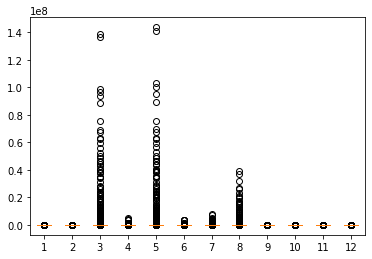

In [98]:
#Seleccionar columnas numéricas
X = datos.iloc[:,0:12]

#Visualizar cómo se distribuye cada columna
import matplotlib.pyplot as plt
plt.boxplot(X)
plt.show()

In [99]:
datos.describe()

,Number of deaths,Number of people injured,Number of people affected,Number of people left homeless,Number of total people affected,Reconstruction costs,Insured damages against,Total economic damages,Death rates,Injury rates,"Number of people affected per 100,000",Homelessness rate,"Total number of people affected per 100,000",Year
count,10116.000000,10116.000000,1.011600e+04,1.011600e+04,1.011600e+04,1.011600e+04,1.011600e+04,1.011600e+04,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000
mean,165.484490,235.165105,2.666152e+05,4.613451e+03,2.714638e+05,2.396611e+03,1.007042e+04,7.906702e+04,0.126527,0.198756,114.894459,3.003398,118.096613,1987.108541
std,3386.535509,4457.639721,3.747252e+06,9.199474e+04,3.816744e+06,7.531923e+04,1.721699e+05,1.017466e+06,2.927605,7.522503,749.490076,57.942547,756.727409,16.642930
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1990.000000
75%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
max,151065.000000,185232.600000,1.387653e+08,4.812863e+06,1.436605e+08,3.500000e+06,7.945880e+06,3.918065e+07,223.726209,660.033652,17427.674520,4929.577465,17427.674520,2010.000000


In [101]:
pd.options.mode.chained_assignment = None  # default='warn'

#Función para identificar outliers por medio del método de la desviación estándar
def outliers (datos,columna):
    print("\033[1m" + columna + "\033[0m")
    
    #Se prepara un subset de datos eliminando los valores de 0, pues su volumen es alto y se decide no considerarlo en los cálculos
    sub_datos = datos[datos[columna]!=0]
    #Seleccionar columna como una seria
    X = sub_datos[columna]
    
    #Media y desviación estándar de cada columna
    mean = X.mean()
    print("Media: {:.2f}" .format(mean))
    std = X.std()
    print("Desviación estándar: {:.2f}" .format(std))
    # Definición de cortes: 2.5 desviaciones estándar en cálculo de límites
    print("Cortes")
    cut_off = std * 2.5
    lower, upper = mean - cut_off, mean + cut_off
    print("   Corte bajo: %f" %lower)
    print("   Corte alto: %f" %upper)

    #Identificación de valores atípicos
    outliers = list()
    for x in X:
        if x < lower:
            outliers.append(x)
        elif x > upper:
            outliers.append(x)
        else:
            pass
    print("Outliers: {}" .format(len(outliers)))
    #print(outliers)
    
    #Visualización
    #DataSet para visualizar
    new_X = sub_datos[[columna]]
    new_X['Upper']=upper
    new_X['Lower']=lower

    #Gráfico
    fig,ax = plt.subplots()
    ax.scatter(sub_datos.index,new_X[columna],label=columna)
    ax.plot(sub_datos.index,new_X["Upper"],color="r")
    ax.plot(sub_datos.index,new_X["Lower"],color="r")
    ax.set_ylabel(columna)
    ax.set_title("Identificación de outliers")
    plt.show()
    
      
    #Eliminar datos - nuevo DataFrame de retorno
    #Mantener valores por encima del límite bajo
    datos = datos[datos[columna] >= lower]
    #Mantener valores por debajo del límite alto
    datos = datos[datos[columna] <= upper]
    return(datos)
    

(10116, 16)
Number of deaths
Media: 899.06
Desviación estándar: 7853.34
Cortes
   Corte bajo: -18734.295569
   Corte alto: 20532.406310
Outliers: 19


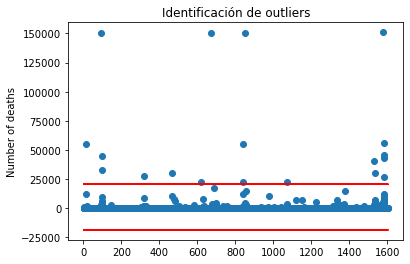

(10097, 16)
Number of people injured
Media: 1712.57
Desviación estándar: 12407.97
Cortes
   Corte bajo: -29307.345275
   Corte alto: 32732.492410
Outliers: 11


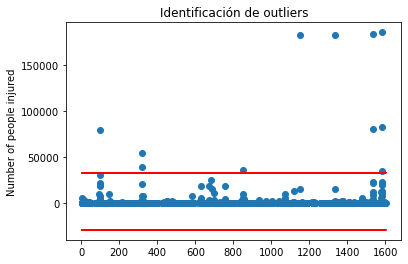

(10086, 16)
Number of people affected
Media: 1116877.73
Desviación estándar: 6554246.48
Cortes
   Corte bajo: -15268738.472407
   Corte alto: 17502493.940414
Outliers: 38


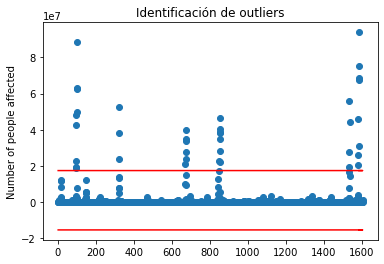

(10048, 16)
Number of people left homeless
Media: 16010.73
Desviación estándar: 61251.50
Cortes
   Corte bajo: -137118.030576
   Corte alto: 169139.484245
Outliers: 22


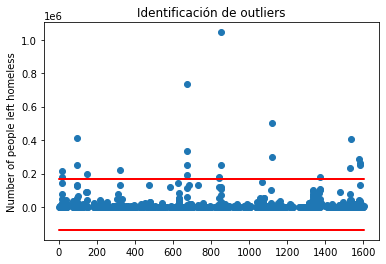

(10026, 16)
Number of total people affected
Media: 210879.08
Desviación estándar: 1044523.36
Cortes
   Corte bajo: -2400429.314420
   Corte alto: 2822187.468717
Outliers: 29


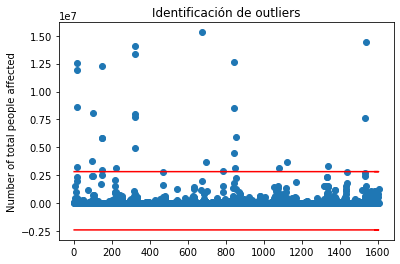

(9997, 16)
Reconstruction costs
Media: 164598.75
Desviación estándar: 574214.90
Cortes
   Corte bajo: -1270938.512476
   Corte alto: 1600136.009774
Outliers: 1


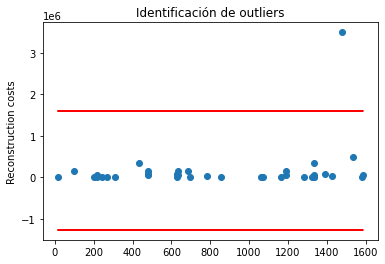

(9996, 16)
Insured damages against
Media: 275824.47
Desviación estándar: 813159.73
Cortes
   Corte bajo: -1757074.848724
   Corte alto: 2308723.783818
Outliers: 8


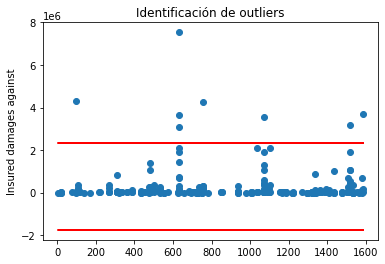

(9988, 16)
Total economic damages
Media: 207222.89
Desviación estándar: 808909.94
Cortes
   Corte bajo: -1815051.954904
   Corte alto: 2229497.739351
Outliers: 27


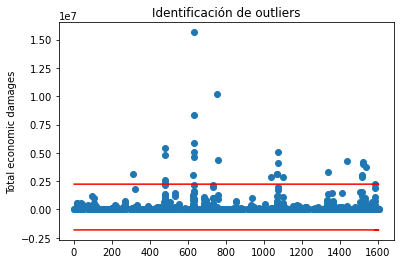

(9961, 16)
Death rates
Media: 0.50
Desviación estándar: 4.09
Cortes
   Corte bajo: -9.720700
   Corte alto: 10.711694
Outliers: 12


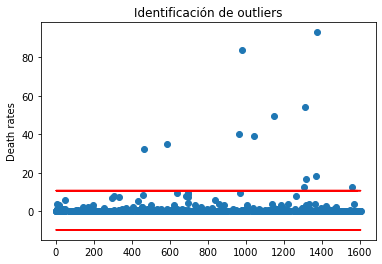

(9949, 16)
Injury rates
Media: 0.60
Desviación estándar: 3.37
Cortes
   Corte bajo: -7.818643
   Corte alto: 9.008735
Outliers: 12


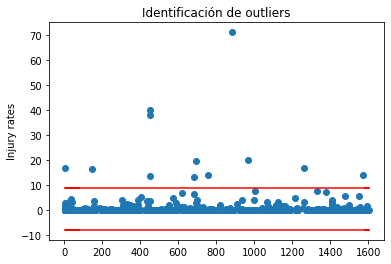

(9937, 16)
Number of people affected per 100,000
Media: 536.57
Desviación estándar: 1530.27
Cortes
   Corte bajo: -3289.100619
   Corte alto: 4362.239992
Outliers: 50


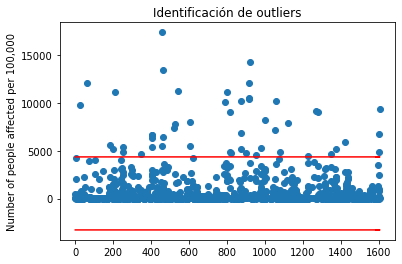

(9887, 16)
Homelessness rate
Media: 25.54
Desviación estándar: 179.75
Cortes
   Corte bajo: -423.829638
   Corte alto: 474.913529
Outliers: 5


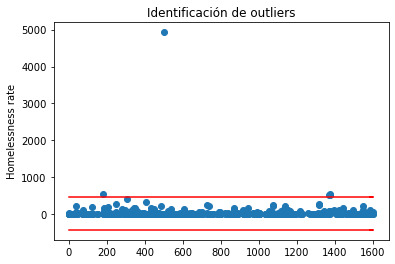

(9882, 16)


In [102]:
#Lista de columnas numéricas
X = datos.iloc[:,0:12]
columnas_num = X.columns
columnas=list(columnas_num)
columnas
print(datos.shape)

#Revisión columna por columna
for columna in columnas:
    datos = outliers (datos,columna)
    print(datos.shape)

### 5.4 Conclusiones
- Base de datos inicial: 
    - shape: (19248, 16)
- Valores perdidos: 
    - Se identifican 9132 filas con valores nulos.  
    - shape: (10116, 16)
- Valores duplicados:
    - No se identifican filas duplicadas
    - shape: (10116, 16)
- Valores atípicos:
    - Se identifican 234 outliers
    - shpae: (9882, 16)

## 6. Feature Selection
Selección de columnas como variables de entrada para el modelo

### 6.1 Valores únicos

Columnas con valores constantes

In [103]:
#Función para identificar columnas con valores únicos
ops = {}
def identify_single_unique(data):
        """Finds features with only a single unique value. NaNs do not count as a unique value. """

        # Calculate the unique counts in each column
        unique_counts = data.nunique()
        unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        unique_stats = unique_stats.sort_values('nunique', ascending = True)
        
        # Find the columns with only one unique count
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 
                                                                                                                0: 'nunique'})

        to_drop = list(record_single_unique['feature'])
    
        record_single_unique = record_single_unique
        ops['single_unique'] = to_drop
        
        print('%d features with a single unique value.\n' % len(ops['single_unique']))
        return(to_drop) #Identificar la(s) columna(s) que cuenta con valores úicos

In [104]:
col_unicas= identify_single_unique(datos)
print(col_unicas)

0 features with a single unique value.

[]


### 6.2 Poca varianza
Eliminación de columnas con poca varianza con parámetros definidos

In [105]:
#Seleccionar columnas numéricas
X = datos.iloc[:,0:12]
print(X.shape)

#Revisión de las desviaciones estándar en las columnas
display(X.std().sort_values())

(9882, 12)


Injury rates                                  0.280903
Death rates                                   0.310308
Homelessness rate                            13.262971
Number of people affected per 100,000       302.478037
Number of deaths                            334.714362
Number of people injured                    446.212470
Reconstruction costs                       4242.378306
Number of people left homeless             5628.994769
Insured damages against                   18440.766446
Total economic damages                   102552.453081
Number of people affected                124266.645649
Number of total people affected          126168.740916
dtype: float64

>Threshold=0.00, Features=12
>Threshold=0.05, Features=12
>Threshold=0.10, Features=10
>Threshold=0.15, Features=10
>Threshold=0.20, Features=10
>Threshold=0.25, Features=10
>Threshold=0.30, Features=10
>Threshold=0.35, Features=10
>Threshold=0.40, Features=10
>Threshold=0.45, Features=10
>Threshold=0.50, Features=10


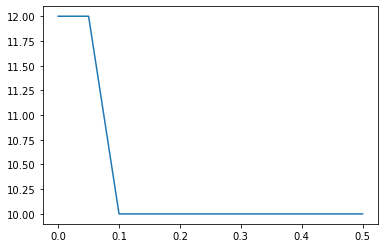

In [106]:
#importación de librería 
from sklearn.feature_selection import VarianceThreshold #librería para determinar umbral de varianza como parámetro
from numpy import arange 

#Seleccionar columnas numéricas
X = datos.iloc[:,0:12]

#se define un rango de variazas
#Va iterando de 5% en 5% desde 0 a 0.55
thresholds = arange(0.0, 0.55, 0.05)
results = list()

#Se van probando una a una
for t in thresholds:
  # define the transform con parámetro de umbral que va iterando
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('>Threshold=%.2f, Features=%d' % (t, n_features))
  # store the result
  results.append(n_features)
  ###########################
 #Viendo el gráfico, dónde corto
from matplotlib import pyplot
pyplot.plot(thresholds, results)
pyplot.show()

In [107]:
#Las dos con la columnas con menor varianza
to_drop = ['Death rates','Injury rates']
datos = datos.drop(to_drop, axis=1)
datos.shape

(9882, 14)

### 6.3 Colinealidad
Eliminación de columnas relacionadas entre sí

In [108]:
#Función para identificar colinealidad entre las variables
ops = {}
def identify_collinear(data, correlation_threshold, one_hot=False):
        """
        Finds collinear features based on the correlation coefficient between features. 
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal. 
        """
        
        correlation_threshold = correlation_threshold
        one_hot_correlated = one_hot
        
         # Calculate the correlations between every column
        if one_hot:
            # One hot encoding
            features = pd.get_dummies(data)
            one_hot_features = [column for column in features.columns if column not in base_features]

            # Add one hot encoded data to original data
            data_all = pd.concat([features[one_hot_features], data], axis = 1)
            
            corr_matrix = pd.get_dummies(features).corr()

        else:
            corr_matrix = data.corr()
        
        corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop to record pairs of correlated features
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

        record_collinear = record_collinear
        ops['collinear'] = to_drop
        
        print('%d features with a correlation magnitude greater than %0.2f.\n' % (len(ops['collinear']), correlation_threshold))
        #return(corr_matrix) #para revisar la matriz de correlación
        return(to_drop) #identificar la columna a eliminar por correlación

In [109]:
#Identificar las columnas con colinealidad
col_colinealidad = identify_collinear(datos, .95)
#col_colinealidad
print("Eliminar columnas: ", col_colinealidad)


2 features with a correlation magnitude greater than 0.95.

Eliminar columnas:  ['Number of total people affected', 'Total number of people affected per 100,000']


<ipython-input-108-9f7b324732cf>:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


In [110]:
#Eliminar las columnas con colinealidad (1 del par)
print(datos.shape)
datos = datos.drop(col_colinealidad, axis=1)
print(datos.shape)

(9882, 14)
(9882, 12)


In [111]:
datos.describe()

,Number of deaths,Number of people injured,Number of people affected,Number of people left homeless,Reconstruction costs,Insured damages against,Total economic damages,"Number of people affected per 100,000",Homelessness rate,Year
count,9882.000000,9882.000000,9.882000e+03,9882.000000,9882.000000,9882.000000,9.882000e+03,9882.000000,9882.000000,9882.000000
mean,23.357772,26.256426,1.636688e+04,553.928466,102.942066,1267.754574,1.386456e+04,51.137047,1.420514,1986.997571
std,334.714362,446.212470,1.242666e+05,5628.994769,4242.378306,18440.766446,1.025525e+05,302.478037,13.262971,16.666957
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1970.000000
50%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1990.000000
75%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2000.000000
max,17492.100000,19647.900000,2.780000e+06,146608.400000,334400.000000,702250.000000,2.192485e+06,4268.990363,411.884920,2010.000000


### 6.4 Conclusiones
- Valores únicos
    - No se identifica ninguna columna con valores constantes
    - shape: (9882, 16)
- Poca varianza
    - Se eliminan las columnas 'Death rates' y 'Injury rates' por poca varainza
    - shape: (9882, 14)
- Colinealidad
    - Se eliminan las columnas 'Number of total people affected', 'Total number of people affected per 100,000' por presentar colinealidad con otras del mismo DataSet
    - shape: (9882, 12)

## 7. Modelo

In [113]:
data_final = datos

In [114]:
#Las líneas en donde sí se encuentra la variable a predecir
data_final = data_final[data_final['Total economic damages']!=0]
data_final

,Number of deaths,Number of people injured,Number of people affected,Number of people left homeless,Reconstruction costs,Insured damages against,Total economic damages,"Number of people affected per 100,000",Homelessness rate,Entity,Year,Disaster
1,0.0,0.0,4800.0,0.0,0.0,0.0,20.0,44.060951,0.000000,Afghanistan,1960,drought
5,3.7,0.0,476000.0,0.0,0.0,0.0,5.0,2061.379726,0.000000,Afghanistan,2000,drought
6,0.0,0.0,1525000.0,0.0,0.0,0.0,14200.0,4212.833017,0.000000,Afghanistan,2010,drought
13,205.0,0.0,963348.3,0.0,0.0,0.0,19570.0,280.686846,0.000000,Africa,1960,drought
14,11900.0,0.0,1951200.0,0.0,0.0,0.0,40720.0,452.699691,0.000000,Africa,1970,drought
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,5757.4,614.1,593856.9,23824.7,0.0,20000.0,289520.0,21.688474,0.876167,Upper middle income,2010,extreme temperatures
1580,155.3,60.0,0.0,0.0,0.0,0.0,350000.0,0.000000,0.000000,World,1970,extreme temperatures
1581,533.5,21.7,3864.5,134.0,0.0,63230.0,389460.0,0.078450,0.002751,World,1980,extreme temperatures
1582,932.3,185.4,711683.0,1600.0,0.0,72390.0,1050655.0,12.602761,0.029097,World,1990,extreme temperatures


### 7.1 Segregación de base

Base de prueba y de entrenamiento

In [115]:
# Set variables.
X = data_final.drop(['Total economic damages','Entity','Disaster'], axis=1)
X = pd.get_dummies(X)
y = data_final['Total economic damages']

In [116]:
# Spliting data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 7.2 Regresión lineal sin variables categóricas

**Modelo inicial**

In [117]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True) #constante: intersección (b0)
modelo_lineal = sm.OLS(endog=y_train, exog=X_train,) #OLS: Mínimos cuadrados ordinario
modelo_lineal = modelo_lineal.fit()
print(modelo_lineal.summary())
#A mayor Z más significativa (en valor absoluto)

                              OLS Regression Results                              
Dep. Variable:     Total economic damages   R-squared:                       0.406
Model:                                OLS   Adj. R-squared:                  0.400
Method:                     Least Squares   F-statistic:                     72.50
Date:                    Wed, 27 Apr 2022   Prob (F-statistic):          8.82e-102
Time:                            19:14:51   Log-Likelihood:                -13248.
No. Observations:                     966   AIC:                         2.652e+04
Df Residuals:                         956   BIC:                         2.656e+04
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\auxis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Reducción del modelo**

In [118]:
# Variables reducidas
X_train = X_train.drop(['Reconstruction costs','Number of people injured','Homelessness rate','Year'], axis=1)
X_test = X_test.drop(['Reconstruction costs','Number of people injured','Homelessness rate','Year'], axis=1)

In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True) #constante: intersección (b0)
modelo_lineal = sm.OLS(endog=y_train, exog=X_train,) #OLS: Mínimos cuadrados ordinario
modelo_lineal = modelo_lineal.fit()
print(modelo_lineal.summary())
#A mayor Z más significativa (en valor absoluto)

                              OLS Regression Results                              
Dep. Variable:     Total economic damages   R-squared:                       0.404
Model:                                OLS   Adj. R-squared:                  0.401
Method:                     Least Squares   F-statistic:                     130.0
Date:                    Wed, 27 Apr 2022   Prob (F-statistic):          3.30e-105
Time:                            19:14:59   Log-Likelihood:                -13249.
No. Observations:                     966   AIC:                         2.651e+04
Df Residuals:                         960   BIC:                         2.654e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\auxis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Modelo definitivo**

In [120]:
# Variables finales
X_train = X_train.drop(['const'], axis=1)

In [121]:
from sklearn import linear_model
modelo_lineal2 = linear_model.LinearRegression()
modelo_lineal2.fit(X_train, y_train)

print("Intercept:", modelo_lineal2.intercept_)
print("Coeficiente:", modelo_lineal2.coef_)
print("Precisión del modelo:", modelo_lineal2.score(X_test,y_test))


# return accuracy score-->Return the coefficient of determination of the prediction.
acc_lineal = round(modelo_lineal2.score(X_test, y_test), 10)
print("Regression Score: {0}".format(acc_lineal))


Intercept: 59829.27982470945
Coeficiente: [ 32.91249961   0.19217764   1.62182341   2.83975976 -28.57484523]
Precisión del modelo: 0.3804583894622604
Regression Score: 0.3804583895


**Conclusión:** 

El modelo logra predecir correctamente en el 38% de los casos

### 7.3 Modelo sin encoding

In [122]:
#Ajuste de DataSet
data_final2 = datos[datos['Total economic damages']!=0]

# Set variables.
X = data_final2.drop(['Total economic damages','Entity'], axis=1)
X = pd.get_dummies(X)
y = data_final2['Total economic damages']

In [123]:
#División de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [124]:
#Aplicación del modelo
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True) #constante: intersección (b0)
modelo_lineal = sm.OLS(endog=y_train, exog=X_train,) #OLS: Mínimos cuadrados ordinario
modelo_lineal = modelo_lineal.fit()
print(modelo_lineal.summary())
#A mayor Z más significativa (en valor absoluto)

                              OLS Regression Results                              
Dep. Variable:     Total economic damages   R-squared:                       0.421
Model:                                OLS   Adj. R-squared:                  0.411
Method:                     Least Squares   F-statistic:                     43.10
Date:                    Wed, 27 Apr 2022   Prob (F-statistic):          7.46e-101
Time:                            19:15:15   Log-Likelihood:                -13235.
No. Observations:                     966   AIC:                         2.650e+04
Df Residuals:                         949   BIC:                         2.659e+04
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\auxis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Conclusión:**

El modelo considerando sin tranformar las variables categóricas no muestra en todos los desastres que tenga alguna influencia sobre la variable respuesta 'Total economic damages'

### 7.4 Modelo con encoding

In [125]:
#Aplicación de Encoding para codificar Desastre
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#Ajuste de DataSet
data_final2 = datos[datos['Total economic damages']!=0]

#Desastre
data_final2['Disaster_encoded'] = LabelEncoder().fit_transform(data_final2['Disaster'])
#tabla de codificación
disaster_codification = data_final2.groupby("Disaster")['Disaster_encoded'].mean()
print(disaster_codification)

Disaster
drought                 0.0
earthquakes             1.0
extreme temperatures    2.0
floods                  3.0
landslides              4.0
mass movements          5.0
volcanic activity       6.0
wildfires               7.0
Name: Disaster_encoded, dtype: float64


In [126]:
# Set variables.
X = data_final2.drop(['Total economic damages','Entity','Disaster'], axis=1)
X = pd.get_dummies(X)
y = data_final2['Total economic damages']

#División de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#Aplicación del modelo
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True) #constante: intersección (b0)
modelo_lineal = sm.OLS(endog=y_train, exog=X_train,) #OLS: Mínimos cuadrados ordinario
modelo_lineal = modelo_lineal.fit()
print(modelo_lineal.summary())
#A mayor Z más significativa (en valor absoluto)

                              OLS Regression Results                              
Dep. Variable:     Total economic damages   R-squared:                       0.410
Model:                                OLS   Adj. R-squared:                  0.404
Method:                     Least Squares   F-statistic:                     66.44
Date:                    Fri, 18 Feb 2022   Prob (F-statistic):          1.93e-102
Time:                            11:35:54   Log-Likelihood:                -13244.
No. Observations:                     966   AIC:                         2.651e+04
Df Residuals:                         955   BIC:                         2.656e+04
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

**Conclusión:**

El modelo considerando con la transformación de datos categórico muestra la variable Disaster_encoded con un impacto significativo sobre la variable respuesta 'Total economic damages'